### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
# Reading data from your local path.
train = pd.read_csv(r'D:\Data Science\test & train\project 3\counterfeit_train.csv')
test = pd.read_csv(r'D:\Data Science\test & train\project 3\counterfeit_test.csv')

In [3]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column           

In [4]:
# Displaying values in a dataframe
train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [5]:
# Displaying values in a dataframe
test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


In [6]:
# Displaying shape of dataframe

print(train.shape, test.shape)

(6818, 12) (1705, 11)


In [7]:
#count of null values for specific columns in dataframe
train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [8]:
#count of null values for specific columns in dataframe
test.isnull().sum()

Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64

In [9]:
train_missing_values = ['Counterfeit_Weight']

for i in train_missing_values:
    if train[i].isnull().sum()!= 0:
        train[i]=train[i].fillna(train[i].mean())
        
test_missing_values = ['Counterfeit_Weight']

for i in test_missing_values:
    if test[i].isnull().sum()!= 0:
        test[i]=test[i].fillna(test[i].mean())

In [10]:
#count of null values for specific columns in dataframe
train.isnull().sum()

Medicine_ID            0
Counterfeit_Weight     0
DistArea_ID            0
Active_Since           0
Medicine_MRP           0
Medicine_Type          0
SidEffect_Level        0
Availability_rating    0
Area_Type              0
Area_City_Type         0
Area_dist_level        0
Counterfeit_Sales      0
dtype: int64

In [11]:
#checking unique values in each column
print(train.nunique())

Medicine_ID            1557
Counterfeit_Weight      415
DistArea_ID              10
Active_Since              9
Medicine_MRP           5097
Medicine_Type            16
SidEffect_Level           2
Availability_rating    6317
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
Counterfeit_Sales      3142
dtype: int64


In [12]:
train.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

In [13]:
train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100000,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,14.115057,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025000,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800000,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,14.115057,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [14]:
# Active since till today
train['Years'] = 2023-train['Active_Since']
# Drop Active_Since
train.drop('Active_Since', axis=1, inplace=True)

test['Years'] = 2023-test['Active_Since']
# Drop Active_Since
test.drop('Active_Since', axis=1, inplace=True)

In [15]:
train['DistArea_ID'].value_counts()

Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64

In [16]:
train['Medicine_Type'].value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [17]:
train['SidEffect_Level'].value_counts()

mild        4434
critical    2384
Name: SidEffect_Level, dtype: int64

In [18]:
train['Area_dist_level'].value_counts()

Medium     2203
Unknown    1938
Small      1928
High        749
Name: Area_dist_level, dtype: int64

In [19]:
train['Area_City_Type'].value_counts()

Tier 3    2655
Tier 2    2244
Tier 1    1919
Name: Area_City_Type, dtype: int64

In [20]:
train['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [21]:
# For categorical variables, we will create dummies
for col in ['Medicine_Type','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level',"DistArea_ID"]:  
    temp = pd.get_dummies(train[col], prefix=col, drop_first=True)
    train = pd.concat([train, temp],1)
    train.drop([col],1,inplace=True)
       
    temp = pd.get_dummies(test[col], prefix=col, drop_first=True)
    test = pd.concat([test, temp],1)
    test.drop([col],1,inplace=True)

In [22]:
train.head()

,Medicine_ID,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,Years,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,...,Area_dist_level_Unknown,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,DistArea_ID_Area027,DistArea_ID_Area035,DistArea_ID_Area045,DistArea_ID_Area046,DistArea_ID_Area049
0,RRA15,13.100000,160.2366,0.070422,1775.5026,28,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,YVV26,14.115057,110.4384,0.013000,3069.1520,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,LJC15,9.025000,259.4092,0.060783,2603.0920,28,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,GWC40,11.800000,99.9830,0.065555,1101.7130,28,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,QMN13,14.115057,56.4402,0.248859,158.9402,40,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
# Dependent variables and independent variables
X = train.drop(['Counterfeit_Sales','Medicine_ID'], axis=1)
Y = train['Counterfeit_Sales']
print(X.shape, Y.shape)

(6818, 37) (6818,)


In [24]:
# Splitting data into train & test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=18)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5454, 37) (1364, 37) (5454,) (1364,)


In [25]:
# Model building- Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [26]:
# fitting the model
lm.fit(X_train, Y_train)

LinearRegression()

In [27]:
# Predict the target variable for the validation set
y_pred_train = lm.predict(X_train)

In [28]:
# Model Evaluation
# R squared error
score_1 = metrics.r2_score(Y_train, y_pred_train)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, y_pred_train)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.5622070380564801
Mean Absolute Error :  826.9366272878327


In [29]:
score_mae_1 = 1-(score_2/1660)
score_mae_1

0.5018454052482935

In [30]:
# Hyperparameter Tuning
parameters = parameter = { 'fit_intercept':['True','False'],'n_jobs':[-1]}

In [31]:
# Grid search
lm_regressor = GridSearchCV(lm, param_grid=parameters, cv=5)

In [32]:
# fitting the data to model
lm_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'], 'n_jobs': [-1]})

In [33]:
# best parameters & highest accuracy

print(lm_regressor.best_params_, lm_regressor.best_score_)

{'fit_intercept': 'True', 'n_jobs': -1} 0.5570164732452151


In [34]:
y_pred_train_hyp = lm_regressor.predict(X_train)

In [35]:
# Model Evaluation
# R squared error
score_3 = metrics.r2_score(Y_train, y_pred_train_hyp)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_train, y_pred_train_hyp)

print("R squared error : ", score_3)
print('Mean Absolute Error : ', score_4)

R squared error :  0.5622070380564801
Mean Absolute Error :  826.9366272878327


In [36]:
score_mae_2 = 1-(score_4/1660)
score_mae_2

0.5018454052482935

In [37]:
# Model building- Random Forest
clf =RandomForestRegressor()

In [38]:
# Hyperparameter Tuning
parameter = {'n_estimators':[100],'criterion':['squared_error'], 'max_depth':[3,5,7,10], 'min_samples_split':[2,4,6], 'min_samples_leaf':[5,10]}
clf_regressor = GridSearchCV(clf,param_grid=parameter,cv=5)

In [39]:
clf_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100]})

In [40]:
# best parameters & highest accuracy

print(clf_regressor.best_params_, clf_regressor.best_score_)

{'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 100} 0.5924197947938824


In [41]:
clf_pred_train = clf_regressor.predict(X_train)

In [42]:
# Model Evaluation
# R squared error
score_5 = metrics.r2_score(Y_train, clf_pred_train)

# Mean Absolute Error
score_6 = metrics.mean_absolute_error(Y_train, clf_pred_train)

print("R squared error : ", score_5)
print('Mean Absolute Error : ', score_6)

R squared error :  0.6083254441922892
Mean Absolute Error :  739.3465817659644


In [43]:
score_mae_3 = 1-(score_6/1660)
score_mae_3

0.5546104929120697

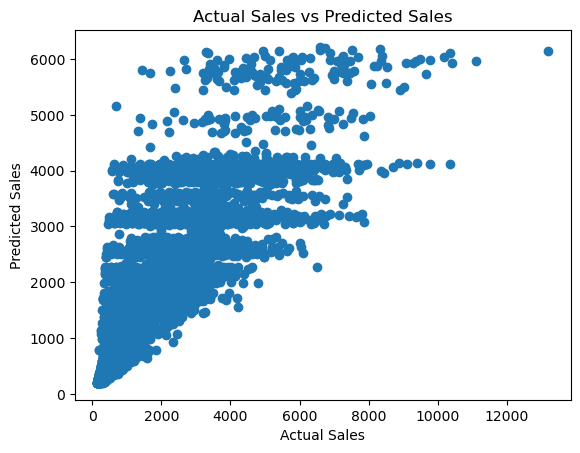

In [44]:
# Visualizing the actual Prices and predicted prices

plt.scatter(Y_train, clf_pred_train)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.show()

In [45]:
clf_pred_test = clf_regressor.predict(X_test)

In [46]:
# Model Evaluation
# R squared error
score_7 = metrics.r2_score(Y_test, clf_pred_test)

# Mean Absolute Error
score_8 = metrics.mean_absolute_error(Y_test, clf_pred_test)

print("R squared error : ", score_7)
print('Mean Absolute Error : ', score_8)

R squared error :  0.6275910571463295
Mean Absolute Error :  737.9305381601597


In [47]:
score_mae_4 = 1-(score_8/1660)
score_mae_4

0.5554635312288194

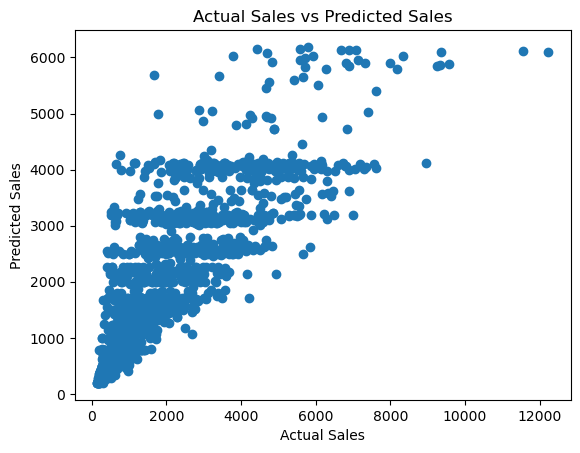

In [48]:
# Visualizing the actual sales and predicted sales

plt.scatter(Y_test, clf_pred_test)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.show()

In [49]:
test_1 = test.drop('Medicine_ID',axis=1)

In [50]:
clf_pred_test_act = clf_regressor.predict(test_1)

In [51]:
pd.DataFrame(list(zip(list(clf_pred_test_act))),columns=['Counterfeit_Sales']).to_csv('Medicine_Sales_Pred_rf.csv')